<a href="https://colab.research.google.com/github/rickegss/prouni2020-exploratory-analysis/blob/main/Prouni_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science - Basic Pratice Project - PROUNI 2020 Dados Abertos

In this project, we will create the dataframe and perform data preprocessing, following steps of cleaning and treatment based on the questions and insights we want to explore. Next, we will generate graphs to visualize patterns and trends, analyzing the insights they reveal about our study.

Importing the used libraries

In [1]:
import pandas as pd # → data manipulation
import seaborn as sns # → creating plots/graphs
import matplotlib.pyplot as plt # → advanced statistical visualizations
import plotly.express as px # → for interactive and visually-pleasing charts
from pathlib import Path # → for directory resolution
import os

Extracting the data

In [2]:
current_dir = Path(os.getcwd())
root = current_dir.parent.parent
read_path = root / 'data' / 'raw' / 'Prouni2020.csv'
save_path = root / 'data' / 'processed' / 'prouni_df.csv'
report_path = root / 'reports' / 'figures'

In [3]:
data = pd.read_csv(read_path, sep=';', encoding='latin1')

First look on the DataFrame, before data processing:

In [4]:
display(data.head(6))

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,2020,322,UNIVERSIDADE PAULISTA,IPATINGA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DISTÂNCIA,991.XXX.XXX-91,F,Parda,11/08/1973,N,SUDESTE,MG,GOVERNADOR VALADARES
1,2020,163,UNIVERSIDADE ESTÁCIO DE SÁ,FORTALEZA,EAD VIA CORPVS - CE,INTEGRAL,EAD,MARKETING,CURSO A DISTÂNCIA,067.XXX.XXX-01,M,Parda,13/05/1987,N,NORDESTE,CE,FORTALEZA
2,2020,17670,FACULDADE DE QUIXERAMOBIM,QUIXERAMOBIM,FACULDADE DE QUIXERAMOBIM - UNIQ,INTEGRAL,PRESENCIAL,FARMÁCIA,NOTURNO,623.XXX.XXX-27,M,Parda,23/07/2001,N,NORDESTE,CE,MOMBACA
3,2020,203,UNIVERSIDADE SÃO JUDAS TADEU,SAO PAULO,PAULISTA,PARCIAL,PRESENCIAL,DIREITO,MATUTINO,089.XXX.XXX-40,F,Branca,04/04/2003,N,NORDESTE,BA,IBITITA
4,2020,203,UNIVERSIDADE SÃO JUDAS TADEU,SAO PAULO,PAULISTA,INTEGRAL,PRESENCIAL,DIREITO,MATUTINO,173.XXX.XXX-09,F,Branca,07/12/1977,N,SUDESTE,SP,SAO PAULO
5,2020,203,UNIVERSIDADE SÃO JUDAS TADEU,SAO PAULO,UNIDADE JABAQUARA,INTEGRAL,PRESENCIAL,MEDICINA VETERINÁRIA,NOTURNO,508.XXX.XXX-99,F,Parda,17/12/2001,N,SUDESTE,SP,SAO PAULO


As observed, some columns are not relevant to the analysis. To improve readability and data treatment, the DataFrame will be reduced.

The year 2020 is the only one in the dataset, so 'ANO_CONCESSAO_BOLSA' will be removed, along with 'CODIGO_EMEC_IES_BOLSA', 'CAMPUS', and 'CPF_BENEFICIARIO'.

In [5]:
data = data.drop(['ANO_CONCESSAO_BOLSA','CODIGO_EMEC_IES_BOLSA','CAMPUS','CPF_BENEFICIARIO'], axis=1)

Now, we gonna rename the columns to a clear, undestanding and short label to make the dataframe easy to work with.

In [6]:
data.columns=[
    'INSTITUICAO',
    'MUNICIPIO',
    'BOLSA',
    'MODALIDADE',
    'CURSO',
    'TURNO',
    'SEXO',
    'RACA',
    'NASCIMENTO',
    'PCD',
    'REGIAO',
    'UF_ALUNO',
    'CIDADE_ALUNO'
]

To gain better insights, we can replace the 'NASCIMENTO' column with an 'IDADE' column that calculates the student's age using datetime operations between the PROUNI 2020's results release date, and the student's birthyear.

Converting 'NASCIMENTO' to datetime format, and replacing it with an 'IDADE' column:

In [7]:
data['NASCIMENTO'] = pd.to_datetime(data['NASCIMENTO'], format="%d/%m/%Y")

# Calculating by the 2020 Results Release Date
release = pd.to_datetime('04/02/2020', format="%d/%m/%Y")

data['IDADE'] = ((release - data['NASCIMENTO']).dt.days // 365)

data['NASCIMENTO'] = data['IDADE']
data = data.drop('IDADE', axis=1)

data.rename(columns={'NASCIMENTO': 'IDADE'}, inplace=True)

"Observing the 'RACA' column, we can notice some undesired values. Since we aim to extract social insights based on students' race, we will work only with awarded individuals who have properly declared their race. Therefore, the 'Não Informada' values will be removed, as they correspond to unspecified race."

In [8]:
data["RACA"] = data["RACA"][data['RACA'] != 'Não Informada']

With the data clear and processed, now we can work on the definitive DataFrame:

In [9]:
data.to_csv(save_path, sep=';', encoding='latin1', index=False)
display(data)

,INSTITUICAO,MUNICIPIO,BOLSA,MODALIDADE,CURSO,TURNO,SEXO,RACA,IDADE,PCD,REGIAO,UF_ALUNO,CIDADE_ALUNO
0,UNIVERSIDADE PAULISTA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DISTÂNCIA,F,Parda,46,N,SUDESTE,MG,GOVERNADOR VALADARES
1,UNIVERSIDADE ESTÁCIO DE SÁ,FORTALEZA,INTEGRAL,EAD,MARKETING,CURSO A DISTÂNCIA,M,Parda,32,N,NORDESTE,CE,FORTALEZA
2,FACULDADE DE QUIXERAMOBIM,QUIXERAMOBIM,INTEGRAL,PRESENCIAL,FARMÁCIA,NOTURNO,M,Parda,18,N,NORDESTE,CE,MOMBACA
3,UNIVERSIDADE SÃO JUDAS TADEU,SAO PAULO,PARCIAL,PRESENCIAL,DIREITO,MATUTINO,F,Branca,16,N,NORDESTE,BA,IBITITA
4,UNIVERSIDADE SÃO JUDAS TADEU,SAO PAULO,INTEGRAL,PRESENCIAL,DIREITO,MATUTINO,F,Branca,42,N,SUDESTE,SP,SAO PAULO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166825,CENTRO UNIVERSITÁRIO INTERNACIONAL,CABO FRIO,PARCIAL,EAD,ADMINISTRAÇÃO,CURSO A DISTÂNCIA,F,Parda,23,N,SUDESTE,RJ,SAO PEDRO DA ALDEIA
166826,CENTRO UNIVERSITÁRIO INTERNACIONAL,CABO FRIO,PARCIAL,EAD,RELAÇÕES INTERNACIONAIS,CURSO A DISTÂNCIA,F,Parda,17,N,SUDESTE,RJ,ARARUAMA
166827,CENTRO UNIVERSITÁRIO INTERNACIONAL,CANOAS,PARCIAL,EAD,ADMINISTRAÇÃO,CURSO A DISTÂNCIA,M,Branca,22,N,SUL,RS,CANOAS
166828,CENTRO UNIVERSITÁRIO INTERNACIONAL,ANANINDEUA,PARCIAL,EAD,RELAÇÕES INTERNACIONAIS,CURSO A DISTÂNCIA,F,Parda,44,N,NORTE,PA,ANANINDEUA


To make the charts, the following color pallete will be used:

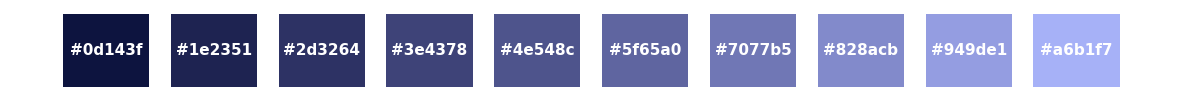

In [10]:
# From brightest to darkest
colors = [
  "#a6b1f7",
  '#949de1',
  "#828acb",
  '#7077b5',
  '#5f65a0',
  '#4e548c',
  '#3e4378',
  '#2d3264',
  '#1e2351',
  '#0d143f'
]

# Reversed colors' order
colors_r = colors[::-1]

plt.figure(figsize=(len(colors_r)*1.5, 1))

for i, cor in enumerate(colors_r):
    plt.bar(i, 1, color=cor)
    plt.text(i, 0.5, cor, ha='center', va='center', color='white', fontsize=11, fontweight='bold')

plt.axis('off')

plt.savefig(report_path / "palette.png", dpi=300, bbox_inches="tight")

plt.show()

At first, let's make a bar chart, based on the 'CURSO' column, to see which courses were granted the most scholarships:

C:\Users\ricardo.gomes\AppData\Local\Temp\ipykernel_20212\3092888068.py:5: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df_filter, x='CURSO', palette=colors[3:4], hue='CURSO', order=top_courses, legend=False)


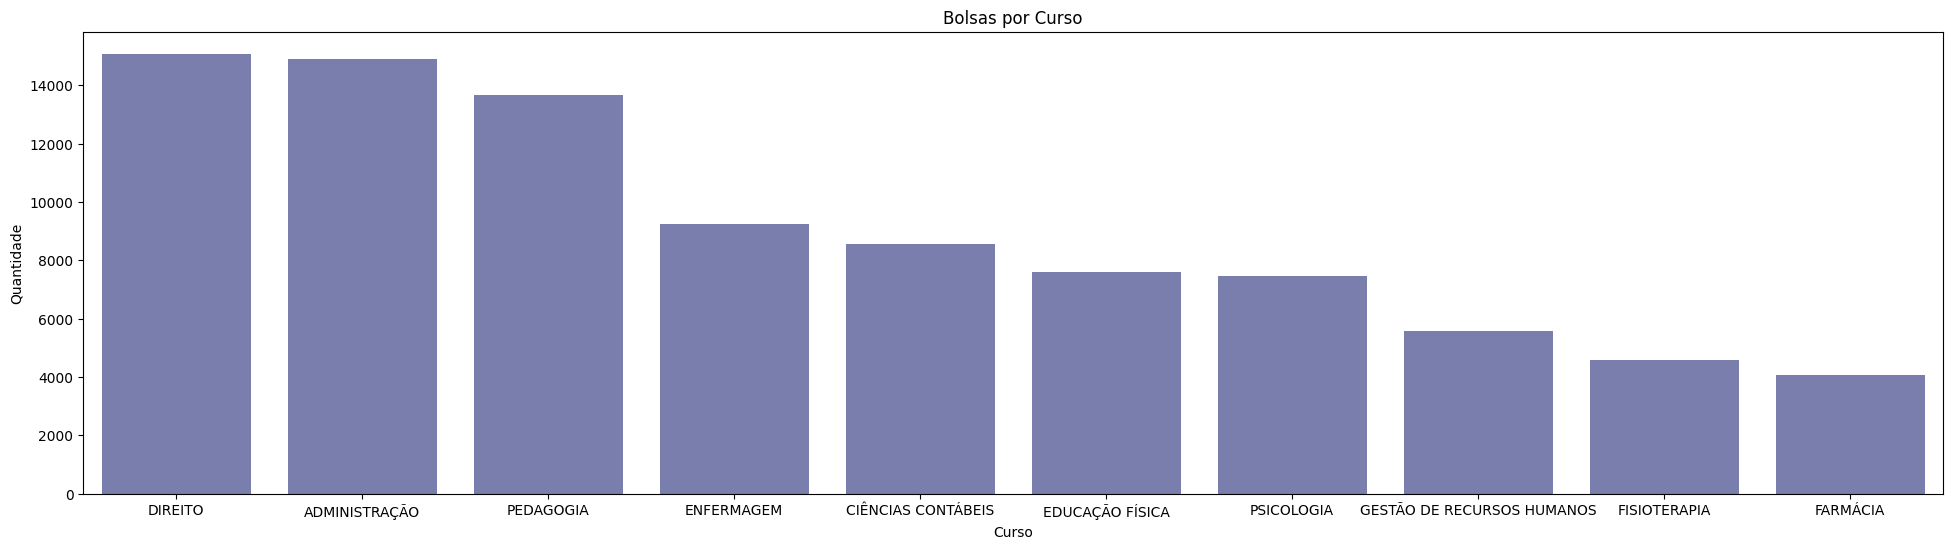

In [11]:
top_courses = data['CURSO'].value_counts().sort_values().nlargest(10).index
df_filter = data[data['CURSO'].isin(top_courses)]

plt.figure(figsize=(24, 6)) # 24 width, 6 height
sns.countplot(data=df_filter, x='CURSO', palette=colors[3:4], hue='CURSO', order=top_courses, legend=False)

plt.title("Bolsas por Curso")
plt.xlabel("Curso")
plt.ylabel("Quantidade")

plt.savefig(report_path / "scholarships_course.png", dpi=300, bbox_inches="tight")
plt.show()

The conclusion drawn from the chart is that the courses Law, Business Administration, and Pedagogy received the highest number of scholarships granted in 2020, showing a considerable gap compared to the other courses.

Next, we want to examine the distribution of scholarships among the 10 courses with the highest number of grants, in order to observe the gap between full and partial scholarships.



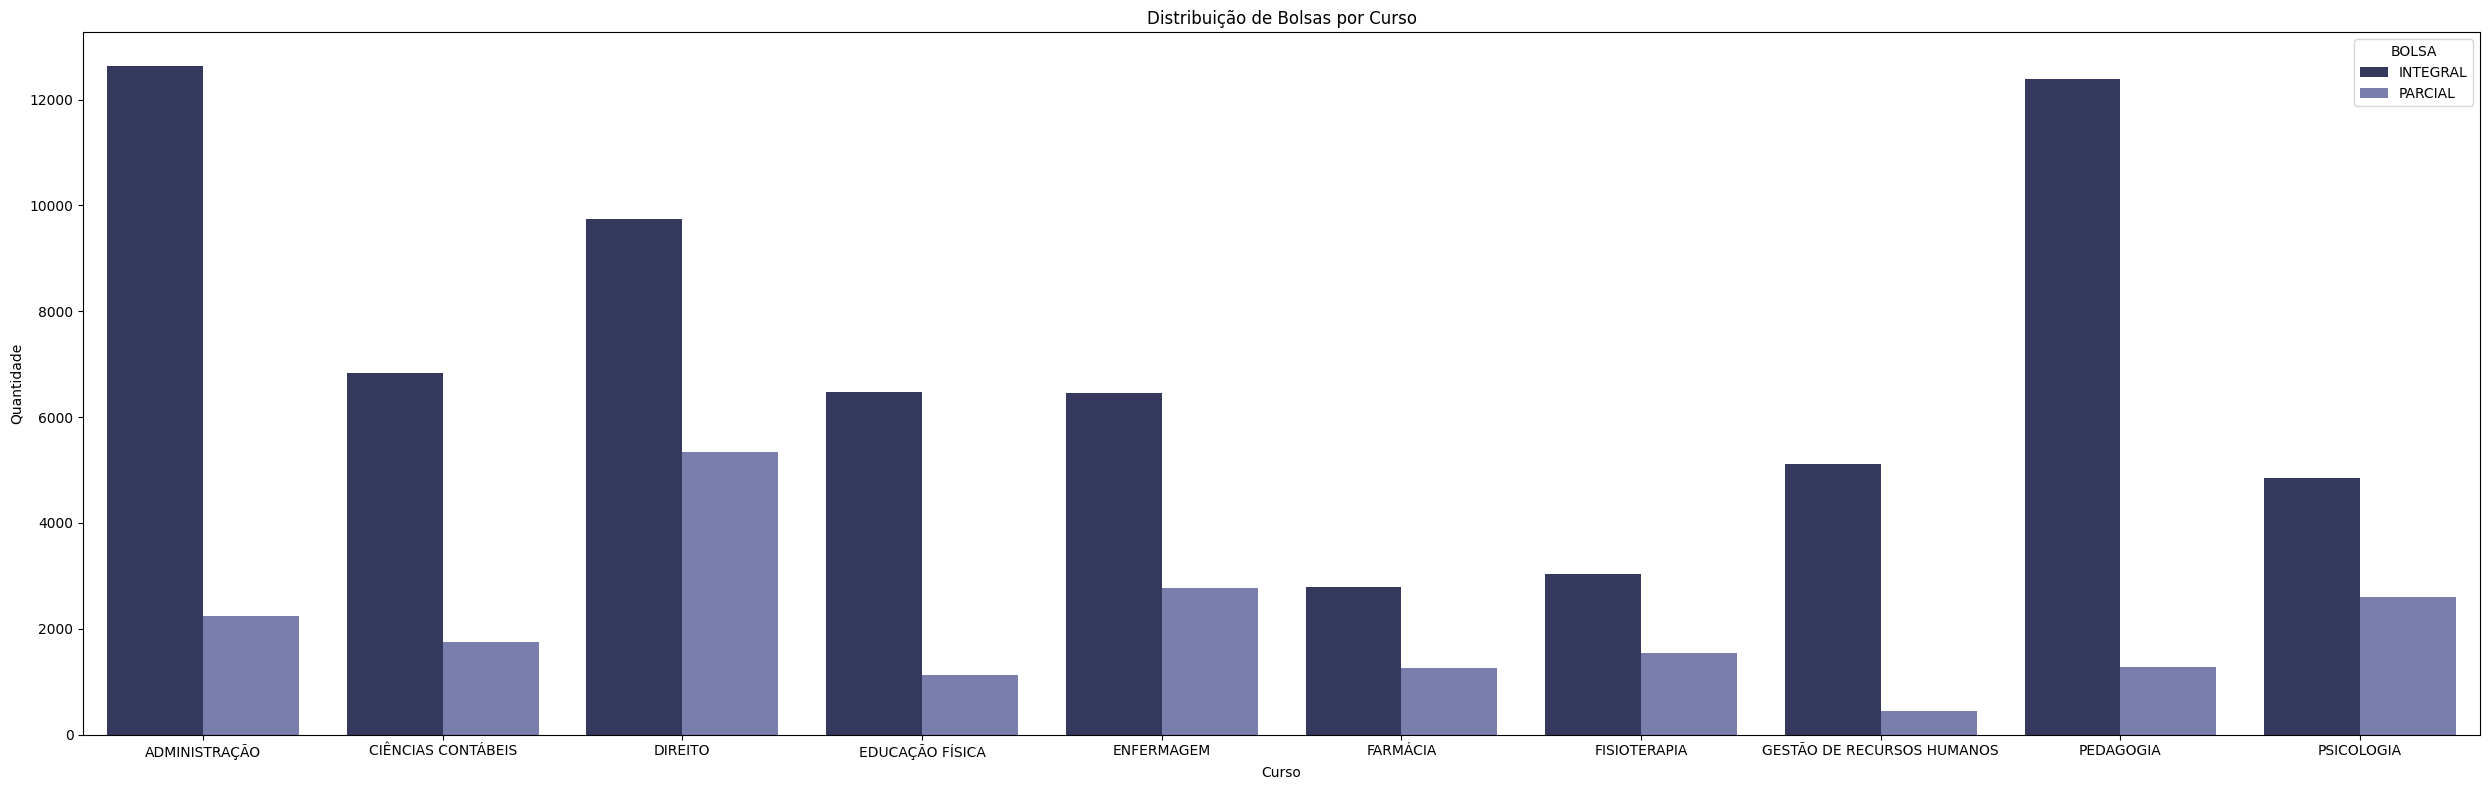

In [12]:
scholarships = df_filter.groupby(['CURSO', 'BOLSA']).size().reset_index(name='QTD')

plt.figure(figsize=(25, 8))
sns.barplot(data=scholarships, x='CURSO', y='QTD', hue='BOLSA', palette=colors_r[2::4])
plt.title('Distribuição de Bolsas por Curso')
plt.xlabel('Curso')
plt.ylabel('Quantidade')

plt.tight_layout()
plt.savefig(report_path / "scholarships_full_partial.png", dpi=300, bbox_inches="tight")
plt.show()

In the chart, we can observe a significant gap between full and partial scholarships for most courses, with Law being the most balanced in terms of scholarship types. On the other hand, Pedagogy has around 90% full scholarships, with only a small portion being partial discounts.

To determine how many students were granted scholarships outside their hometown, we first need to filter those who received them in their own city and then compare that to the remaining number.

In [13]:
data['in_htown'] = data['MUNICIPIO'] == data['CIDADE_ALUNO']
counts = data['in_htown'].value_counts()

Now we can make a pie chart to better visualization:

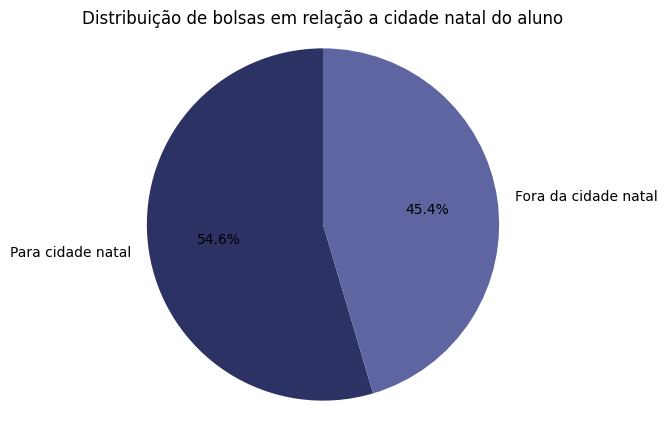

In [14]:
labels = ['Para cidade natal', 'Fora da cidade natal']

plt.figure(figsize=(5,5))

plt.pie(counts, labels=labels, colors=colors_r[2::3], autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de bolsas em relação a cidade natal do aluno')
plt.axis('equal')

plt.savefig(report_path / "hometown.png", dpi=300, bbox_inches="tight")
plt.show()

Now, let's take a look at the most popular courses per state:

In [15]:
top_courses = (
    data.groupby(['UF_ALUNO', 'CURSO'])
      .size()
      .reset_index(name='QTD')
)

top_courses = top_courses.sort_values(['UF_ALUNO', 'QTD'], ascending=[True, False])
top_5_each_state = top_courses.groupby('UF_ALUNO').head(4)
pivot_df = top_5_each_state.pivot(index='UF_ALUNO', columns='CURSO', values='QTD').fillna(0)


fig = px.bar(
    top_5_each_state,
    x='UF_ALUNO',
    y='QTD',
    color='CURSO',
    title='Top 5 Cursos Mais Populares por Estado (Bolsas Concedidas)',
    color_discrete_sequence=colors
)

fig.update_layout(barmode='stack', xaxis_title='Estado', yaxis_title='Quantidade de Bolsas')
fig.show()

We can also gain insight from this chart into the distribution of scholarships across the states of Brazil. Noticing, then, the huge discrepancy among São Paulo, which is the most granted State, and Roraima, with the least number of students granted.

To see if the race of the students granted with scholarships are well-balanced, we need to visualize the distribuition of races per course:

In [16]:
datapie = data['RACA'].value_counts().nlargest(4).reset_index()
datapie.columns = ['RACA', 'QTD']

fig = px.pie(
    datapie,
    names='RACA',
    values='QTD',
    color='RACA',
    color_discrete_sequence=colors_r[1::],
    title='Distribuição de raça de estudante'
)

fig.update_traces(textinfo='percent', pull=[0,0,0,0])
fig.update_layout(legend_title_text='Raças')

fig.write_image(report_path / "race_students.png", scale=3)

fig.show()

Another insight we can get is "How is the distribuiton of the student's sex in each age?".
This is important to see if the age factor has some influence under the gender of the participants and the access to scholarships in Brazil:

<Figure size 1500x700 with 0 Axes>

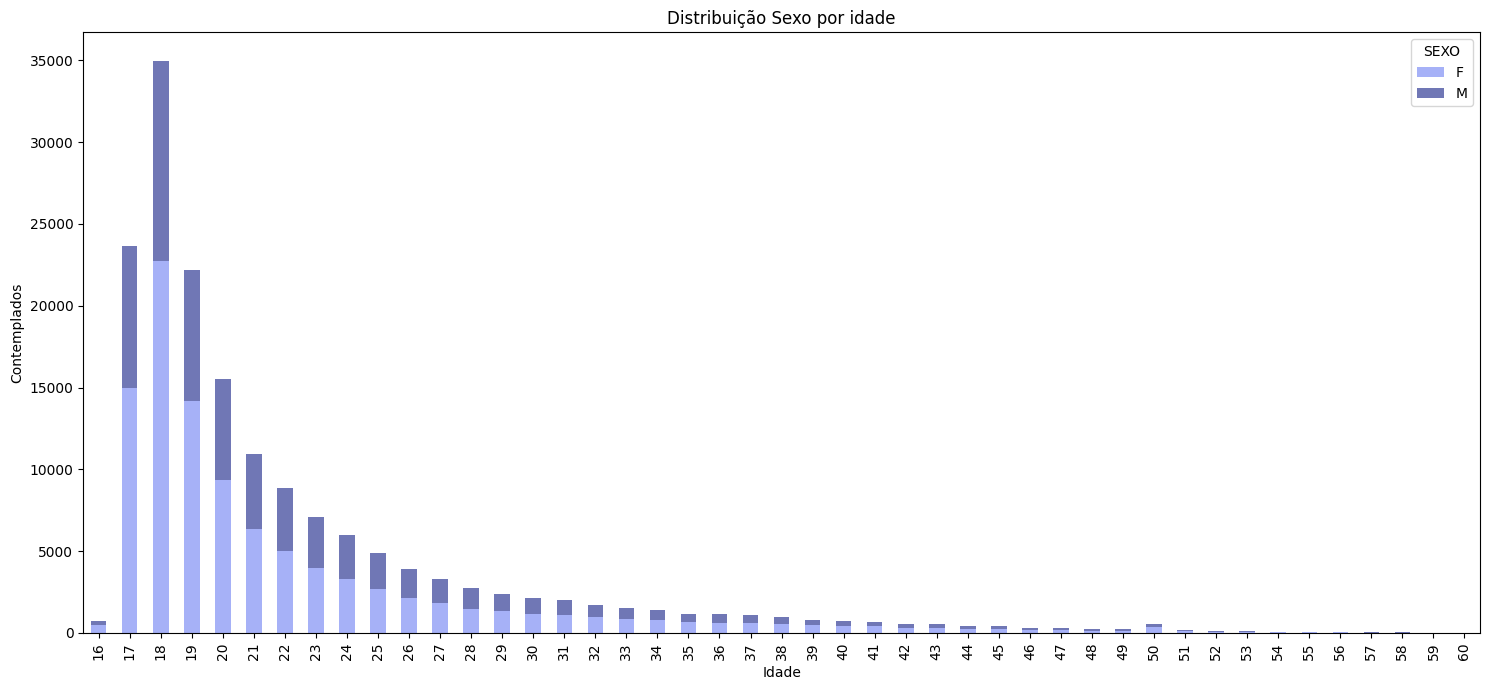

In [17]:
plt.figure(figsize=(15,7))
filt_age = data[(data['IDADE'] > 15) & (data['IDADE'] <= 60)]
contagem = filt_age.groupby(['IDADE', 'SEXO']).size().unstack(fill_value=0)

palette = colors_r[8:9]

contagem.plot(figsize=(15,7), kind='bar', stacked=True, color=colors[::3])
plt.title("Distribuição Sexo por idade")
plt.xlabel('Idade')
plt.ylabel('Contemplados')
plt.tight_layout()

plt.savefig(report_path / "gender_age.png", dpi=300, bbox_inches="tight")
plt.show()

For a final comprehension, we can observe the distribuition of the students skincolors, so it's possible to determine if the scholarships are duly fair in their distribution to people.

In [18]:
datapie = data['RACA'].value_counts().nlargest(4).reset_index()
datapie.columns = ['RACA', 'QTD']

fig = px.pie(
    datapie,
    names='RACA',
    values='QTD',
    color='RACA',
    color_discrete_sequence=['#7077b5', '#a6b1f7', '#3e4378', '#828acb'],
    title='Distribuição de raça de estudante'
)

fig.update_traces(textinfo='percent', pull=[0,0,0,0])
fig.update_layout(legend_title_text='Raças')

fig.show()